In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 각 대중교통 이용객 월마다 계산

In [2]:
bus = pd.read_csv('seoul_bus.csv', encoding = 'cp949')  # 인코딩
bus = bus.copy()                                        # 원본데이터를 지키기위해 카피하여 사용
bus

,년도,월,버스정류장명,승차승객수,하차승객수
0,2019,1,(구)단대동주민센터,6957,6518
1,2019,1,(구)태풍약국,41698,6047
2,2019,1,11단지,6091,1081
3,2019,1,123전자타운.2001아울렛,20604,23324
4,2019,1,12번지건영아파트,11444,12349
...,...,...,...,...,...
288402,2021,12,힐스테이트판교엘포레4단지,409,54
288403,2021,12,힐스테이트판교엘포레6단지,114,110
288404,2021,12,힐스테이트판교엘포레6단지후문,188,70
288405,2021,12,힐탑,67,616


In [3]:
subway = pd.read_csv('seoul_subway.csv', encoding = 'cp949')  # 인코딩
subway = subway.copy()                                        # 원본데이터를 지키기위해 카피하여 사용
subway

,년도,월,지하철역,승차승객수,하차승객수
0,2019,1,4.19민주묘지,78436,74980
1,2019,1,가능,210789,197480
2,2019,1,가락시장,564949,598005
3,2019,1,가산디지털단지,1784137,1855882
4,2019,1,가양,631153,609020
...,...,...,...,...,...
18489,2021,12,회기,666942,640649
18490,2021,12,회룡,332437,328632
18491,2021,12,회현(남대문시장),677129,716336
18492,2021,12,효창공원앞,262534,255787


In [4]:
bike = pd.read_csv('seoul_bike_rent.csv', encoding = 'cp949')  # 인코딩
bike = bike.copy()                                             # 원본데이터를 지키기위해 카피하여 사용
bike

,rent_date,rent_count
0,2019-01-01,8601
1,2019-01-02,14360
2,2019-01-03,16344
3,2019-01-04,17308
4,2019-01-05,12380
...,...,...
1090,2021-12-27,"42,521"
1091,2021-12-28,"51,268"
1092,2021-12-29,"52,017"
1093,2021-12-30,"48,993"


# 사용과정
버스와 지하철의 시계열 월별 리스트 추가

In [5]:
bus_by_month = []
subway_by_month = []
bike_by_month = []

In [6]:
for i in range(2019,2022):          # 버스 월별 사용객
    for j in range(1,13):
        bus_by_month.append(bus[(bus['년도'] == i ) & (bus['월'] == j)]['승차승객수'].sum())
print(bus_by_month)

[153035340, 131620328, 161692282, 161896378, 166585877, 154680973, 163676066, 158606153, 151350244, 165129177, 160071755, 161266174, 143735067, 123177424, 105279908, 110367524, 121441625, 128713709, 137152879, 116869983, 110488887, 123138521, 123355110, 101683336, 101075639, 101033362, 125252413, 123281759, 121710916, 126839257, 119140719, 115355471, 115398400, 123492715, 127876784, 127216822]


In [7]:
for i in range(2019,2022):        # 지하철 월별 사용객
    for j in range(1,13):
        subway_by_month.append(subway[(subway['년도'] == i ) & (subway['월'] == j)]['승차승객수'].sum())
print(subway_by_month)

[221848014, 190335812, 233813277, 235928571, 243338053, 221547039, 229254848, 219672653, 214006728, 240101848, 232284482, 234574904, 207743593, 169582542, 139686779, 149118804, 165100450, 172139520, 184119860, 153500916, 145041726, 169782172, 172429012, 140122036, 142681454, 143511591, 179708599, 178281382, 174779766, 179665956, 160193504, 153448619, 155637466, 173344736, 185375782, 181144277]


In [8]:
bike['년도'] =bike['rent_date'].str.split('-').str[0]    # 따릉이 월별 사용객 구하기위해 전처리
bike['월'] = bike['rent_date'].str.split('-').str[1]
bike=bike.drop(["rent_date"], axis=1)
bike

,rent_count,년도,월
0,8601,2019,01
1,14360,2019,01
2,16344,2019,01
3,17308,2019,01
4,12380,2019,01
...,...,...,...
1090,"42,521",2021,12
1091,"51,268",2021,12
1092,"52,017",2021,12
1093,"48,993",2021,12


In [9]:
bike['rent_count']= bike['rent_count'].str.replace(',','')

In [10]:
bike['rent_count'] = pd.to_numeric(bike['rent_count'])     # str이기에 int로 변환
bike['년도'] = pd.to_numeric(bike['년도'])
bike['월'] = pd.to_numeric(bike['월'])

In [11]:
for i in range(2019,2022):                   # 따릉이 월별 사용객
    for j in range(1,13):
        bike_by_month.append(bike[(bike['년도'] == i ) & (bike['월'] == j)]['rent_count'].sum())
print(bike_by_month)

[495573, 471543, 904819, 1468000, 2232895, 2293879, 2164086, 2101184, 2084222, 2436401, 1537269, 882078, 794162, 762274, 1533535, 2157390, 2480330, 2770858, 2582511, 1733973, 2811990, 2891618, 1990070, 1196309, 812021, 1234546, 2184228, 3043238, 2950150, 3460407, 3377506, 3245974, 3736657, 3445929, 2737291, 1826746]


In [12]:
transport = pd.DataFrame(zip(bus_by_month, subway_by_month,bike_by_month),      # 서울시민 대중교통 사용량
             index = pd.Index(['1901', '1902', '1903', '1904','1905','1906','1907','1908','1909','1910','1911','1912',
                              '2001', '2002', '2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012',
                              '2101', '2102', '2103', '2104','2105','2106','2107','2108','2109','2110','2111','2112']), 
             columns = ['bus', 'subway','bike'])

In [13]:
transport        # 대중교통 이용객 월별 합산수

,bus,subway,bike
1901,153035340,221848014,495573
1902,131620328,190335812,471543
1903,161692282,233813277,904819
1904,161896378,235928571,1468000
1905,166585877,243338053,2232895
1906,154680973,221547039,2293879
1907,163676066,229254848,2164086
1908,158606153,219672653,2101184
1909,151350244,214006728,2084222
1910,165129177,240101848,2436401


In [14]:
transport.corr()   # 사용하려 생각해봤으나 결과를 확인해보니 사용불가. 이용량은 증가중이나, 절대치가 적어서 음의상관관계가 나온다

,bus,subway,bike
bus,1.000000,0.989372,-0.197877
subway,0.989372,1.000000,-0.243362
bike,-0.197877,-0.243362,1.000000


# 대중교통 각 년도별 구분

In [15]:
date = ['1901', '1902', '1903', '1904','1905','1906','1907','1908','1909','1910','1911','1912',    # 월을 column으로 추가
        '2001', '2002', '2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012',
        '2101', '2102', '2103', '2104','2105','2106','2107','2108','2109','2110','2111','2112']

In [16]:
transport1 = pd.DataFrame(zip(date, bus_by_month, subway_by_month,bike_by_month),      # 서울시민 대중교통에 추가
             columns = ['date', 'bus', 'subway','bike'])

In [17]:
transport1

,date,bus,subway,bike
0,1901,153035340,221848014,495573
1,1902,131620328,190335812,471543
2,1903,161692282,233813277,904819
3,1904,161896378,235928571,1468000
4,1905,166585877,243338053,2232895
5,1906,154680973,221547039,2293879
6,1907,163676066,229254848,2164086
7,1908,158606153,219672653,2101184
8,1909,151350244,214006728,2084222
9,1910,165129177,240101848,2436401


In [18]:
transport1_19 = transport1[transport1['date'].str.contains('19')]    # 년도별로 구분
transport1_20 = transport1[transport1['date'].str.contains('20')]
transport1_21 = transport1[transport1['date'].str.contains('21')]

In [19]:
trans_bus = []                                              # 각 대중교통을 전부 년도별로 합산
trans_sub = []
trans_bike = []

trans_bus.append(transport1_19['bus'].sum())
trans_bus.append(transport1_20['bus'].sum())
trans_bus.append(transport1_21['bus'].sum())

trans_sub.append(transport1_19['subway'].sum())
trans_sub.append(transport1_20['subway'].sum())
trans_sub.append(transport1_21['subway'].sum())

trans_bike.append(transport1_19['bike'].sum())
trans_bike.append(transport1_20['bike'].sum())
trans_bike.append(transport1_21['bike'].sum())


trans_bus
trans_sub
trans_bike

[19071949, 23705020, 32054693]

In [20]:
transport_plt = pd.DataFrame(zip(trans_bus, trans_sub,trans_bike),      # 서울시민 대중교통 사용량을 데이터 프레임으로 완성
                index = pd.Index(['19년','20년','21년']) ,
                columns = ['bus', 'subway','bike'])
transport_plt

,bus,subway,bike
19년,1889610747,2716706229,19071949
20년,1445403973,1968367410,23705020
21년,1427674257,2007773132,32054693


In [21]:
trans_bus = []                                                # 각 대중교통을 전부 년도별로 합산 따릉이가 너무 절대치가 적어 
trans_sub = []                                                # 가시성확보를 위해 따릉이만 10배 증량
trans_bike = []

trans_bus.append(transport1_19['bus'].sum())
trans_bus.append(transport1_20['bus'].sum())
trans_bus.append(transport1_21['bus'].sum())

trans_sub.append(transport1_19['subway'].sum())
trans_sub.append(transport1_20['subway'].sum())
trans_sub.append(transport1_21['subway'].sum())

trans_bike.append(transport1_19['bike'].sum()*10)
trans_bike.append(transport1_20['bike'].sum()*10)
trans_bike.append(transport1_21['bike'].sum()*10)


trans_bus
trans_sub
trans_bike

[190719490, 237050200, 320546930]

In [22]:
transport_plt1 = pd.DataFrame(zip(trans_bus, trans_sub,trans_bike),      # 증량한 데이터로 데이터 프레임 완성
                index = pd.Index(['19년','20년','21년']) ,
                columns = ['bus', 'subway','bike 10배'])
transport_plt1

,bus,subway,bike 10배
19년,1889610747,2716706229,190719490
20년,1445403973,1968367410,237050200
21년,1427674257,2007773132,320546930


In [23]:
data = transport_plt               # 원본과 증량한 데이터
data1 = transport_plt1

In [24]:
# plt.rcParams["figure.figsize"] = (3,3)      # 19,20년의 사용량을 사용하는 종류별로 월별 사용량 확인하게 표현
# plt.rc('font', family='Malgun Gothic')

# plt.subplot(1, 2, 1)
# plt.plot(data)
# # ax = data.plot.bar(stacked=True)
# plt.title('대중교통 탑승객')

# plt.subplot(1, 2, 2)
# # ax1 = data1.plot.bar(stacked=True)
# plt.plot(data1)
# plt.title('대중교통 탑승객(가시성 증대)')

# plt.show()

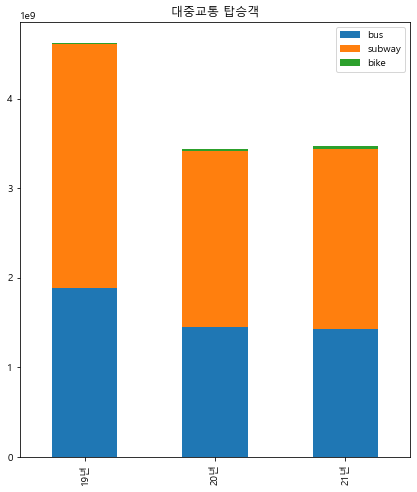

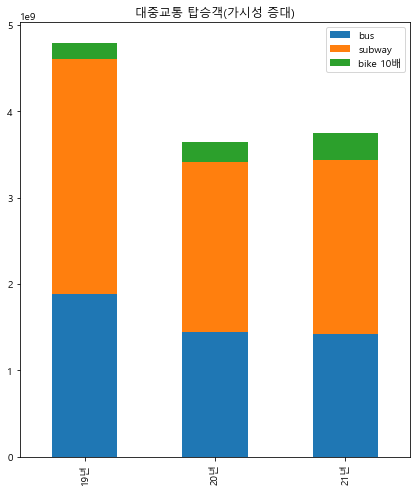

In [25]:
plt.rcParams["figure.figsize"] = (7, 8)      # 3년간 대중교통 이용객 월별 그래프 표현
plt.rc('font', family='Malgun Gothic')

data.plot(kind='bar', stacked=True)
plt.title('대중교통 탑승객')

data1.plot(kind='bar', stacked=True)
plt.title('대중교통 탑승객(가시성 증대)')

plt.show()

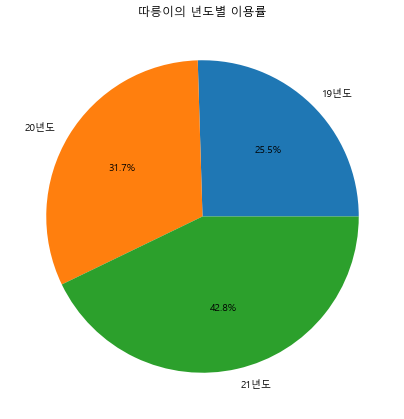

In [26]:
plt.figure(figsize=(7,10))               #따릉이의 전체 이용량 연도별로 표현
data = transport_plt


plt.pie(data['bike'],labels=('19년도','20년도','21년도'), autopct='%.1f%%')
plt.title('따릉이의 년도별 이용률')
plt.show()

# 중간과정 생략(확인하기 위해 놔둠)

In [27]:
s1 = subway['년도'] == 2019
s2 = subway['월'] == 1

In [28]:
subway[s1&s2]['승차승객수'].sum()

221848014

In [29]:
b1 = bus['년도'] == 2019
b2 = bus['월'] == 8

In [30]:
bus[b1&b2]['승차승객수'].sum()

158606153

In [31]:
bus[(bus['년도'] ==2019) & (bus['월'] == 1)]['승차승객수'].sum()

153035340